Code for the base prediction model: Geometric Random Walk. No tune set as there is no parameter selection 

In [1]:
import pandas as pd
import numpy as np

# load data with lag and log transform
dataset = pd.read_csv('MLP1.csv', index_col=0)

columns_to_include = ['log_txcount_lag'] 
X = dataset[columns_to_include].values
y = dataset['log_txcount'].values 


idx = np.arange(X.shape[0])
# Split X and y into train (80), and test(20)
XTrain = X[idx[0:880],:]
yTrain = y[idx[0:880]]

XTest = X[idx[880:1260],:]
yTest = y[idx[880:1260]] 

from sklearn.linear_model import LinearRegression

# Fit a model
model = LinearRegression(fit_intercept=True)
model.fit(XTrain, yTrain)
yPredict = model.predict(XTest)

print('Intercept: \n', model.intercept_) 
    
# Calculating RMSE Test
n = len(yPredict)
rmse = np.linalg.norm(np.exp(yPredict) - np.exp(yTest)) / np.sqrt(n)

print("RMSE Test")
print(rmse)

# Calculating RMSE Train
yPredict2 = model.predict(XTrain)
n = len(yPredict2)
rmseT = np.linalg.norm(np.exp(yPredict2) - np.exp(yTrain)) / np.sqrt(n)
print("RMSE Train")
print(rmseT)


Intercept: 
 0.22904477324919448
RMSE Test
19113.453289189863
RMSE Train
7100.135724328751


In [3]:
np.var(np.exp(yTest))

833996332.924223

** Plotting the forecast**

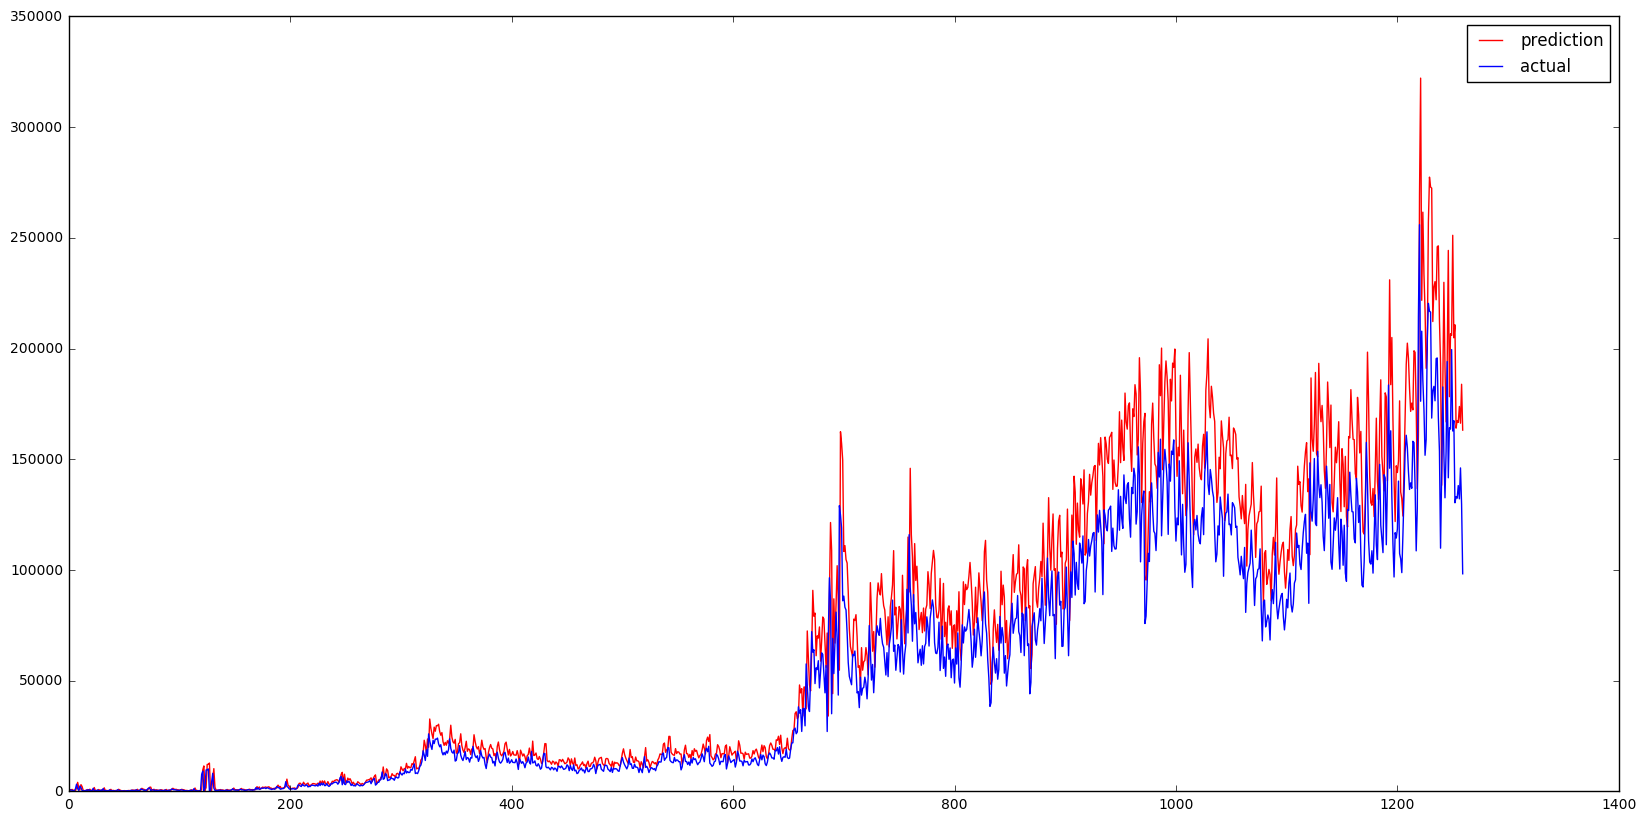

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

# The following calculation uses /delta =0.23 approximated above

dataset['Forecast'] = dataset['Txcount_lag'] * np.exp(0.23)
yForecast = dataset['Forecast'].values 
yTrue = dataset['X.tx'].values

plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(yForecast, c='r', label="prediction")
plt.plot(yTrue, c='b', label="actual")
plt.legend()

plt.savefig('forecast.png', bbox_inches='tight')

Naive Linear Model with information from time 't'

In [35]:
import pandas as pd
import numpy as np

# load data with lag and log transform
dataset = pd.read_csv('MLP1.csv', index_col=0)
# dataset.head()

## Pull data from pandas dataframe

columns_to_include = ['Txcount_lag','Transaction', 'Wt_Price']

X = dataset[columns_to_include].values
y = dataset['X.tx'].values 


idx = np.arange(X.shape[0])

# Split X and y into train (50), tune (20) and test(30)

#XTrain = X[idx[0:630],:]
#yTrain = y[idx[0:630]]

#XTune = X[idx[630:880],:]
#yTune = y[idx[630:880]]

# After selecting co-variates the model is trained on train + tune before test

XTrain = X[idx[0:880],:]
yTrain = y[idx[0:880]] 

XTest = X[idx[880:1260],:]
yTest = y[idx[880:1260]] 

In [36]:
# Fit a model
model = LinearRegression()
model.fit(XTrain, yTrain)
yPredict = model.predict(XTest) # yPredict = model.predict(XTune) used for tuning

# Calculating RMSE Test
n = len(yPredict)
rmse = np.linalg.norm(yPredict - yTest) / np.sqrt(n)

print("RMSE Test")
print(rmse)

# Calculating RMSE Train
yPredict2 = model.predict(XTrain)
n = len(yPredict2)
rmseT = np.linalg.norm(yPredict2 - yTrain) / np.sqrt(n)
print("RMSE Train")
print(rmseT)


RMSE Test
38926.97253534457
RMSE Train
7000.987043330364


**Linear Model with log transform plus information from period t**

In [61]:
import pandas as pd
import numpy as np

# load data with lag and log transform
dataset = pd.read_csv('MLP1.csv', index_col=0)
dataset['log_transaction'] = np.log(dataset['Transaction'] + 1)
dataset['log_Price'] = np.log(dataset['Wt_Price'] + 1) 

# dataset.head()

## Pull data from pandas dataframe

columns_to_include = ['log_txcount_lag','log_transaction', 'log_Price']

X = dataset[columns_to_include].values
y = dataset['log_txcount'].values 


idx = np.arange(X.shape[0])

# Split X and y into train (50), tune (20) and test(30)

#XTrain = X[idx[0:630],:]
#yTrain = y[idx[0:630]]

#XTune = X[idx[630:880],:]
#yTune = y[idx[630:880]]

# After selecting co-variates the model is trained on train + tune before test

XTrain = X[idx[0:880],:]
yTrain = y[idx[0:880]] 

XTest = X[idx[880:1260],:]
yTest = y[idx[880:1260]]  

In [62]:
from sklearn.linear_model import LinearRegression

# Fit a model
model = LinearRegression(fit_intercept=True)
model.fit(XTrain, yTrain)
yPredict = model.predict(XTest)  

# Calculating RMSE Test
n = len(yPredict)
rmse = np.linalg.norm(np.exp(yPredict) - np.exp(yTest)) / np.sqrt(n)

print("RMSE Test")
print(rmse)

# Calculating RMSE Train
yPredict2 = model.predict(XTrain)
n = len(yPredict2)
rmseT = np.linalg.norm(np.exp(yPredict2) - np.exp(yTrain)) / np.sqrt(n)
print("RMSE Train")
print(rmseT)


RMSE Test
38108.98785040406
RMSE Train
6805.677770687829


** A bagged decision tree model ** 

In [54]:
import pandas as pd
import numpy as np

# load data with lag and log transform
dataset = pd.read_csv('MLP1.csv', index_col=0)
# dataset.head()

## Pull data from pandas dataframe

columns_to_include = ['log_txcount_lag', 'Transaction', 'Wt_Price', 'Ex_volume'] # 'Low_Price', 'pricedelta', 'High_price', 'Ex_volume']

X = dataset[columns_to_include].values
y = dataset['log_txcount'].values 


idx = np.arange(X.shape[0])

# Split X and y into train (50), tune (20) and test(30)

#XTrain = X[idx[0:630],:]
#yTrain = y[idx[0:630]]

#XTune = X[idx[630:880],:]
#yTune = y[idx[630:880]]

XTrain = X[idx[0:880],:]
yTrain = y[idx[0:880]] 

XTest = X[idx[880:1260],:]
yTest = y[idx[880:1260]] 

In [55]:
from sklearn.ensemble import BaggingRegressor 

model = BaggingRegressor()
model.fit(XTrain, yTrain)
yPredict = model.predict(XTest)

# Calculating RMSE Test
n = len(yPredict)
rmse = np.linalg.norm(np.exp(yPredict) - np.exp(yTest)) / np.sqrt(n)

print("RMSE Test")
print(rmse)

# Calculating RMSE Train
yPredict2 = model.predict(XTrain)
n = len(yPredict2)
rmseT = np.linalg.norm(np.exp(yPredict2) - np.exp(yTrain)) / np.sqrt(n)
print("RMSE Train")
print(rmseT)


RMSE Test
43337.58436398177
RMSE Train
2540.386751348374


The following is the code for replicating figure 1 presented in the article

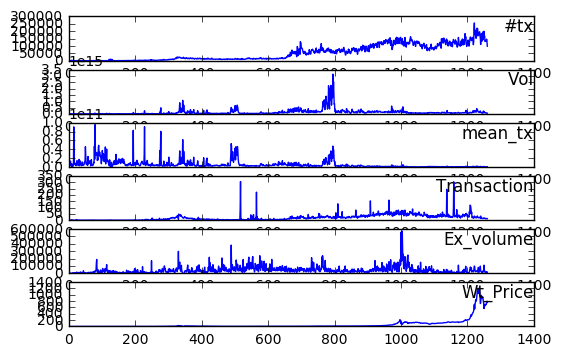

In [14]:
# Figure 1
import pandas as pd
from matplotlib import pyplot
# load dataset
dataset = pd.read_csv('working.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 5, 10, 11]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1

pyplot.savefig('timeseries.png', bbox_inches='tight')
pyplot.show()